## Exercici 1
**Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.**

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from matplotlib import pyplot


In [2]:
df = pd.read_csv('Publicacions Facebook Thailandia.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [4]:
df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [5]:
df.shape

(7050, 16)

*matriz de 7050 filas y 16 registros, donde explica las reacciones publicadas en el facebook de Thailandia entre los años 2016 y 2018*

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [7]:
df['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

[]

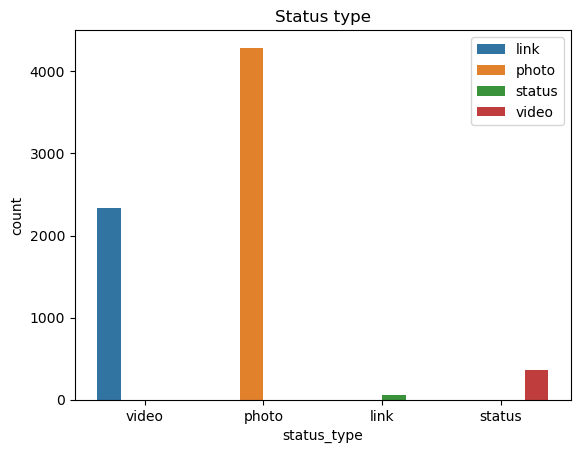

In [8]:
fig = sns.countplot(x='status_type', hue='status_type', data=df)
fig.set_title('Status type')
fig.set_xlabel('status_type')
fig.set_ylabel('count')
fig.legend(labels = ['link', 'photo', 'status', 'video'])

fig.plot()

In [9]:
y = df['status_type']

In [10]:
le = LabelEncoder()

df['status_type'] = le.fit_transform(df['status_type'])

y = le.transform(y)

In [11]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [12]:
# Esborrem les columnes que no ens aporten res
df.drop(['Column1', 'Column2', 'Column3', 'Column4', 'status_id', 'status_published'], axis=1, inplace=True)

In [13]:
df.describe()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,1.704965,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,0.942399,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


<IPython.core.display.Javascript object>

<AxesSubplot:>

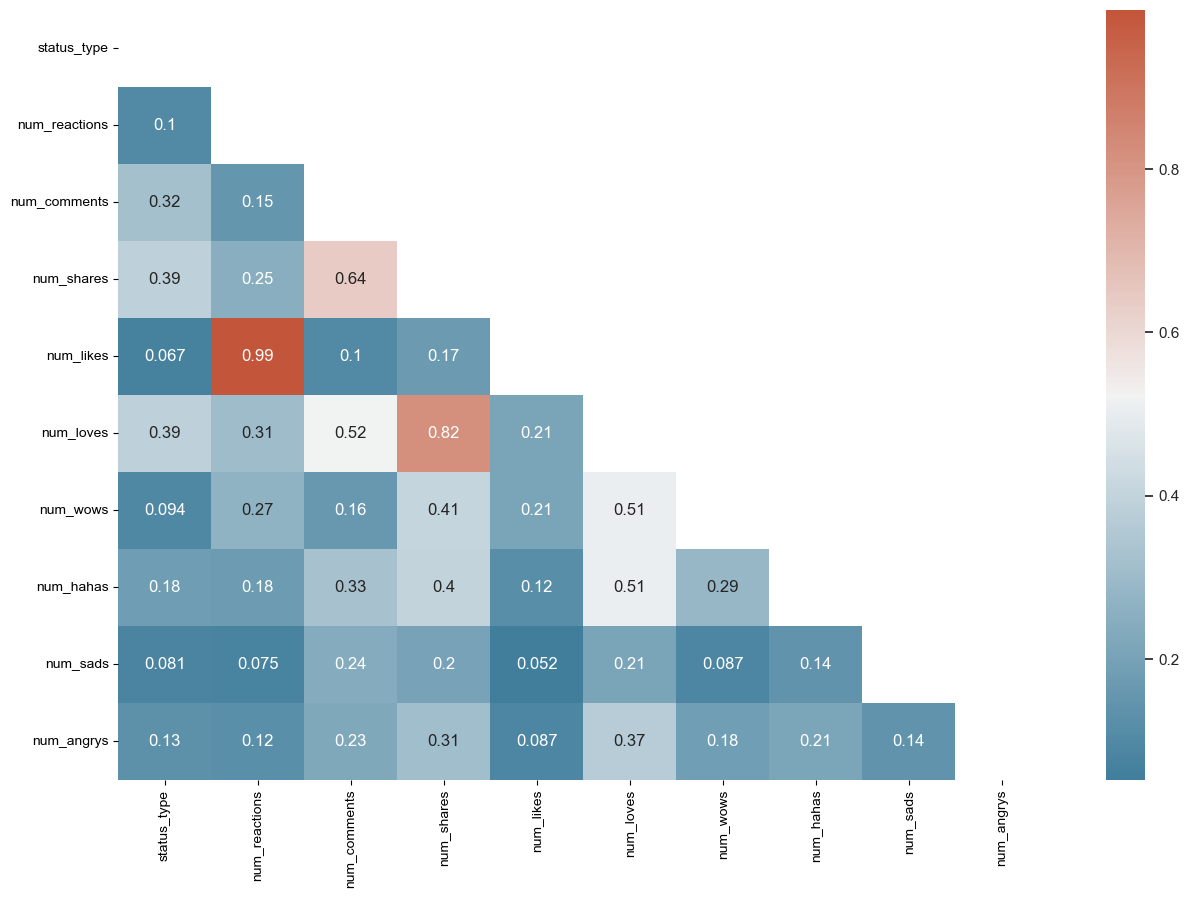

In [14]:
# matriu de correlació
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_theme(style="white")
matrix = np.triu(df.corr())
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), annot=True, mask=matrix, cmap=cmap)

In [15]:
df[['num_shares','num_comments','num_reactions','num_likes','num_loves','num_wows', 'num_hahas', 'num_sads', 'num_angrys']].sample(10)

,num_shares,num_comments,num_reactions,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
482,178,4661,543,397,136,2,6,1,1
512,0,0,86,76,4,0,0,6,0
2485,0,15,24,24,0,0,0,0,0
3460,0,7,25,25,0,0,0,0,0
4037,0,0,0,0,0,0,0,0,0
3651,1,3,43,40,2,1,0,0,0
4090,0,0,0,0,0,0,0,0,0
1548,0,7,258,258,0,0,0,0,0
2519,0,2,24,24,0,0,0,0,0
1196,68,213,2095,2095,0,0,0,0,0


*podemos observar que la columa num_reactions englova num_likes, num_loves, num_wows, num_hahas, num_sads y num_angrys. Por lo tanto nos quedaremos con las tres primeras columnas*

In [16]:
df['num_interacciones'] = df['num_shares'] + df['num_comments'] + df['num_reactions']

In [17]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_interacciones
0,3,529,512,262,432,92,3,1,1,0,1303
1,1,150,0,0,150,0,0,0,0,0,150
2,3,227,236,57,204,21,1,1,0,0,520
3,1,111,0,0,111,0,0,0,0,0,111
4,1,213,0,0,204,9,0,0,0,0,213


<AxesSubplot:>

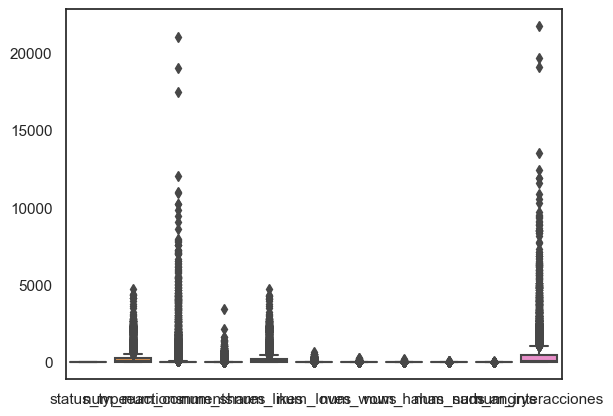

In [18]:
# revisem outliers, primer en conjunt i desprès en cada variable
sns.boxplot(data=df)

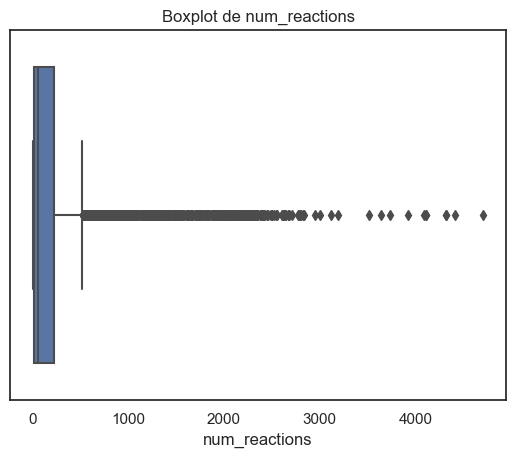

In [19]:
fa = df['num_reactions']
sns.boxplot(x=fa).set_title('Boxplot de num_reactions');

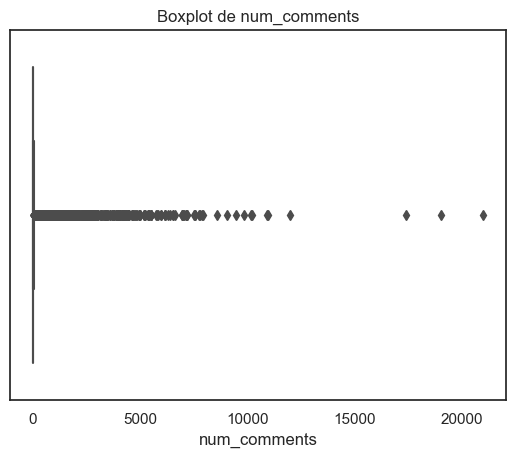

In [20]:
fa = df['num_comments']
sns.boxplot(x=fa).set_title('Boxplot de num_comments');

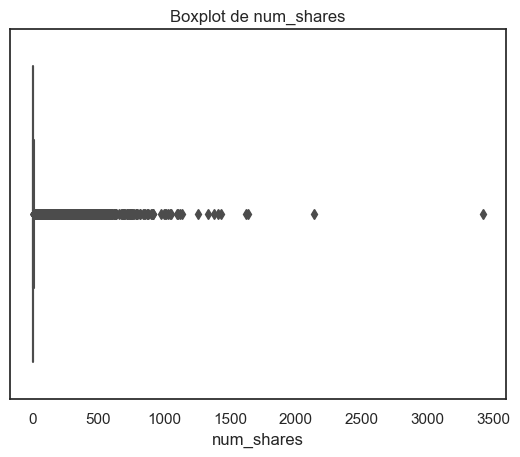

In [21]:
fa = df['num_shares']
sns.boxplot(x=fa).set_title('Boxplot de num_shares');

In [22]:
scaled_df = ['status_type', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

df_def = df.copy()
scaler = RobustScaler()
df_def[scaled_df] = scaler.fit_transform(df_def[scaled_df])
df_def

<IPython.core.display.Javascript object>

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_interacciones
0,1.0,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0,1303
1,0.0,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0,150
2,1.0,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0,520
3,0.0,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0,111
4,0.0,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0,213
...,...,...,...,...,...,...,...,...,...,...,...
7045,0.0,0.146040,-0.173913,0.00,0.184799,0.000000,0.0,0.0,0.0,0.0,89
7046,0.0,-0.215347,-0.173913,0.00,-0.262295,0.333333,0.0,1.0,0.0,0.0,16
7047,0.0,-0.284653,-0.173913,0.00,-0.339791,0.333333,0.0,0.0,0.0,0.0,2
7048,0.0,1.443069,0.347826,5.50,1.734724,0.666667,0.0,0.0,0.0,0.0,385


In [23]:
pca = PCA().fit(df_def)

In [24]:
pca.explained_variance_ratio_

array([9.99240247e-01, 4.55252210e-04, 2.12014537e-04, 5.23273801e-05,
       2.95586666e-05, 8.33436395e-06, 1.79022175e-06, 3.39759389e-07,
       1.35455433e-07, 1.80343355e-13, 1.01942170e-36])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

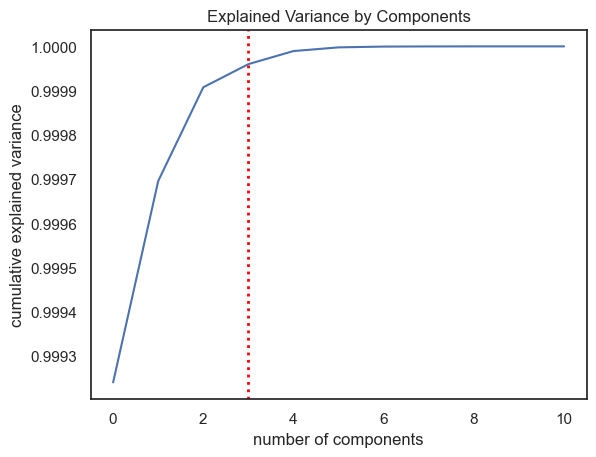

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance by Components')
plt.xlabel('number of components')
plt.axvline(x = 3, ymin = 0, color = 'red', linewidth =2, ls = ':' )
plt.ylabel('cumulative explained variance');

In [26]:
pca = PCA(n_components=3)
pca.fit(df_def)
df_pca = pca.transform(df_def)
display(pd.DataFrame(df_pca, columns=['Component_1','Component_2','Component_3']).describe())

,Component_1,Component_2,Component_3
count,7.050000e+03,7.050000e+03,7.050000e+03
mean,-3.039212e-12,7.828301e-15,6.676834e-15
std,1.152973e+03,2.460992e+01,1.679450e+01
min,-4.946869e+02,-4.321056e+02,-1.414990e+02
25%,-4.756882e+02,-2.967985e+00,6.270208e-01
50%,-4.257277e+02,-9.532513e-01,4.111573e+00
75%,-7.521160e+01,-4.943527e-01,4.995148e+00
max,2.122691e+04,6.953766e+02,2.399264e+02


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

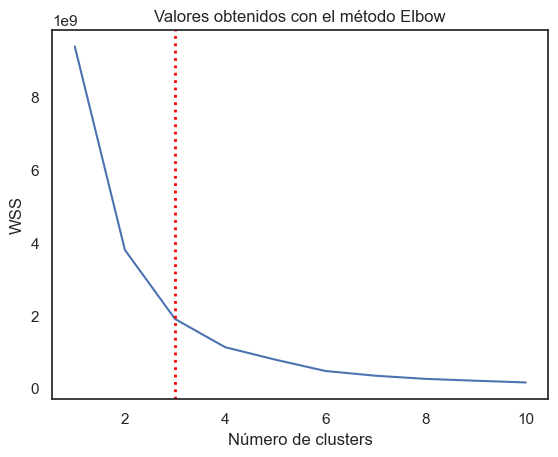

In [27]:
wcss = []  # creamos una lista para almacenar los valores que nos devuelva el modelo con cada grupo de nodos
for i in range(1,11):  # probamos el modelo con con un nodo y vamos aumentando hasta 10 nodos
    kmeans = KMeans(n_clusters=i, random_state= 0)  
    kmeans.fit(df_pca)  
    wcss.append(kmeans.inertia_)  

plt.plot(range(1, 11), wcss)  
plt.title('Valores obtenidos con el método Elbow')  
plt.xlabel('Número de clusters')  
plt.axvline(x = 3, ymin = 0, color = 'red', linewidth =2, ls = ':' )
plt.ylabel('WSS');

In [28]:
cl_3 = KMeans(n_clusters=3, random_state = 0)
cl_3.fit(df_pca)
labels = cl_3.labels_

In [29]:
cl_3.cluster_centers_

array([[-3.24783072e+02, -4.62410673e-01,  2.08043280e+00],
       [ 6.53989754e+03,  2.44585160e+00,  3.85702908e+01],
       [ 1.65280171e+03,  3.32636045e+00, -2.19929378e+01]])

In [30]:
cl_3.inertia_

1901473220.4238768

In [31]:
prediction = cl_3.predict(df_pca)
prediction

array([2, 0, 0, ..., 0, 0, 0])

In [32]:
df_def['Predicted clusters K-M'] = prediction
df_def['Predicted clusters K-M']= cl_3.labels_
df_def.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_interacciones,Predicted clusters K-M
0,1.0,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0,1303,2
1,0.0,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0,150,0
2,1.0,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0,520,0
3,0.0,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0,111,0
4,0.0,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0,213,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

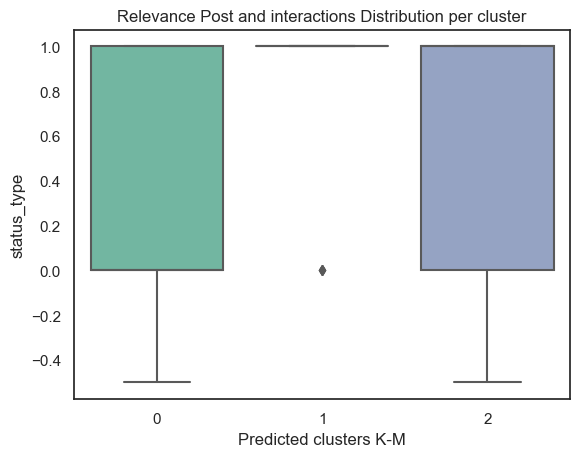

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

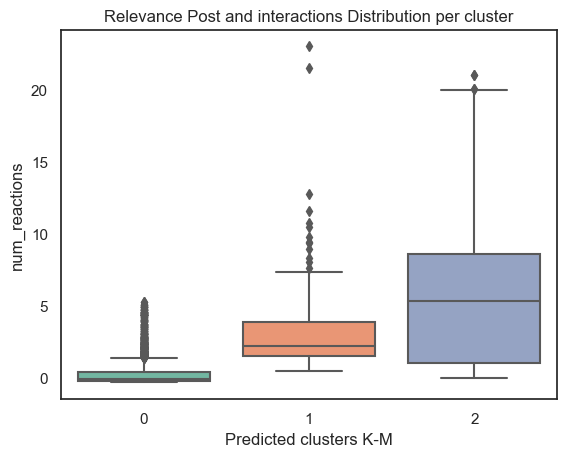

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

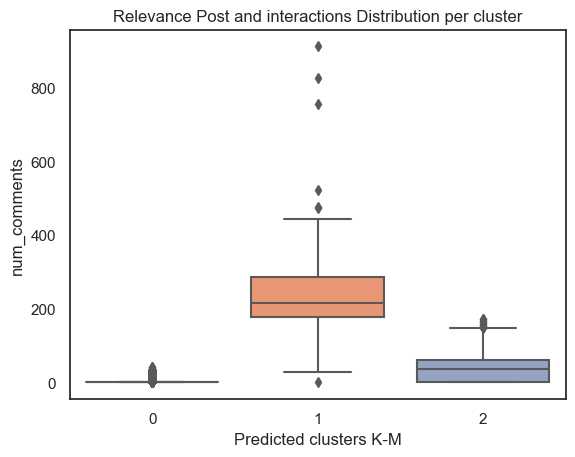

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

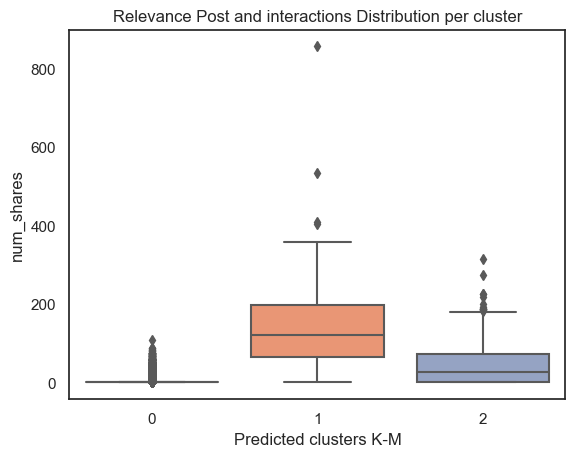

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

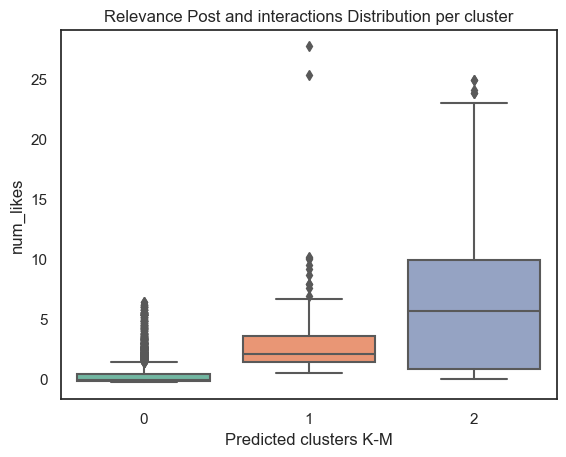

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

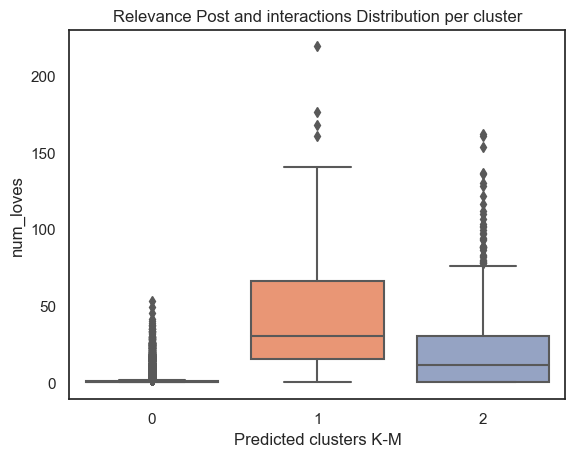

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

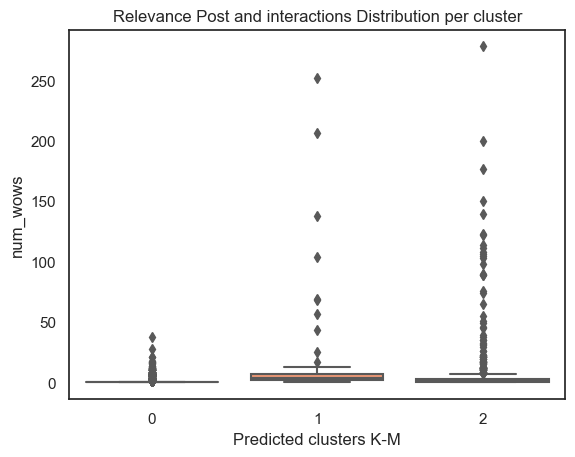

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

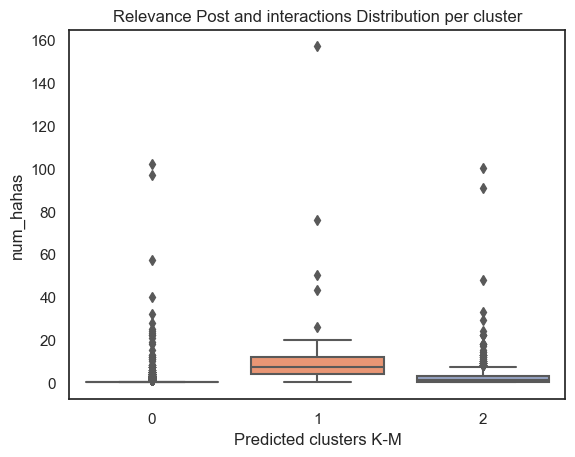

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

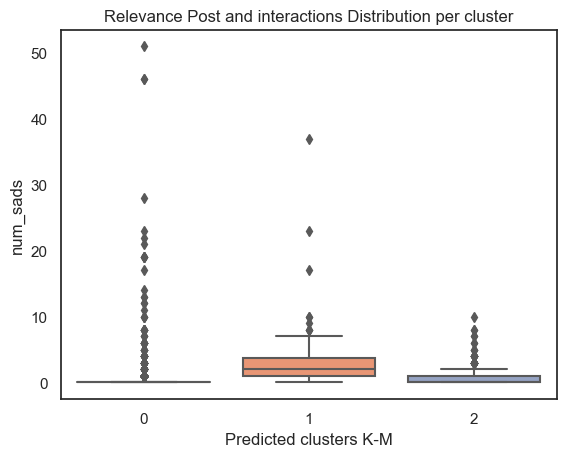

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

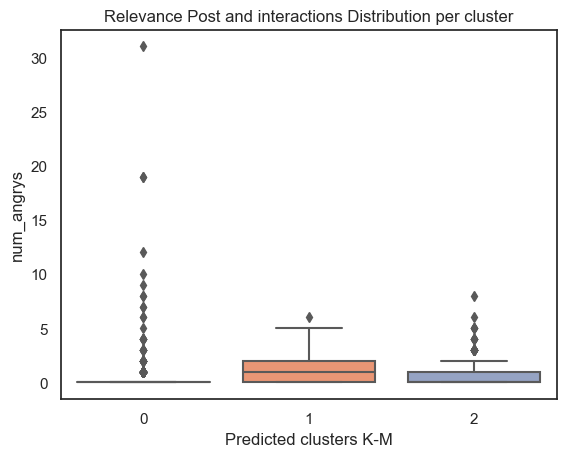

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

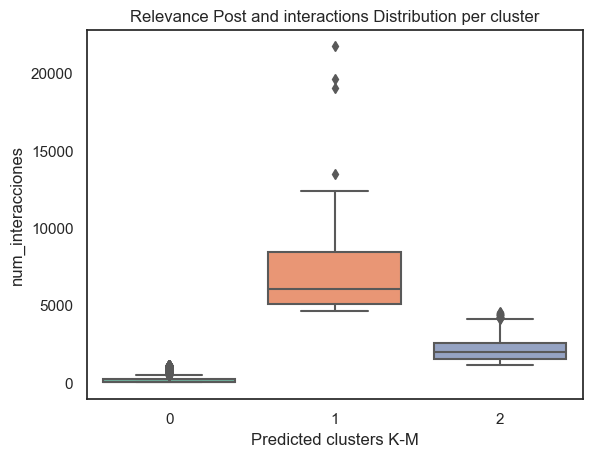

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

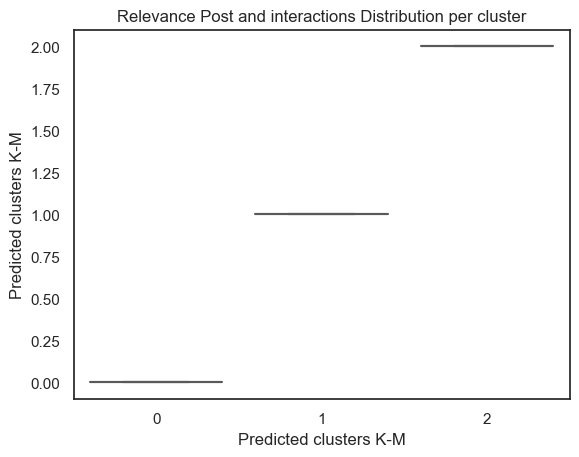

In [33]:
for i in df_def:
    sns.boxplot(data = df_def, y = i, x = "Predicted clusters K-M", palette = "Set2")
    plt.title("Relevance Post and interactions Distribution per cluster".format(i))
    plt.show()

## Exercici 2
**Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

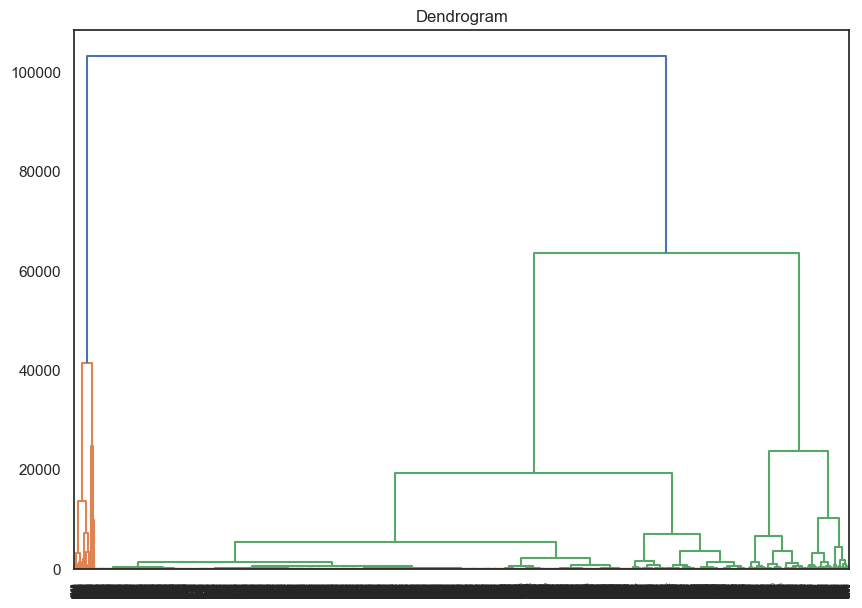

In [35]:
plt.figure(figsize = (10, 7))  
plt.title("Dendrogram")  
shc.dendrogram(shc.linkage(df_pca, method = "ward"))
plt.show()

In [36]:
from sklearn.cluster import AgglomerativeClustering  

In [56]:
aglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
aglo.fit_predict(df_pca)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
df_pca['cluster_predicted'] = aglo.labels_

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "ward")  
agglo.fit_predict(pca_df)
array([1, 0, 2, ..., 2, 2, 2], dtype=int64)
pca_df["predicted_cluster"] = agglo.labels_

In [48]:
df_def

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_interacciones,Predicted clusters K-M,cluster_jer_2,cluster_predicted
0,1.0,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0,1303,2,0,0
1,0.0,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0,150,0,0,0
2,1.0,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0,520,0,0,0
3,0.0,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0,111,0,0,0
4,0.0,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0,213,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.0,0.146040,-0.173913,0.00,0.184799,0.000000,0.0,0.0,0.0,0.0,89,0,0,0
7046,0.0,-0.215347,-0.173913,0.00,-0.262295,0.333333,0.0,1.0,0.0,0.0,16,0,0,0
7047,0.0,-0.284653,-0.173913,0.00,-0.339791,0.333333,0.0,0.0,0.0,0.0,2,0,0,0
7048,0.0,1.443069,0.347826,5.50,1.734724,0.666667,0.0,0.0,0.0,0.0,385,0,0,0


<IPython.core.display.Javascript object>

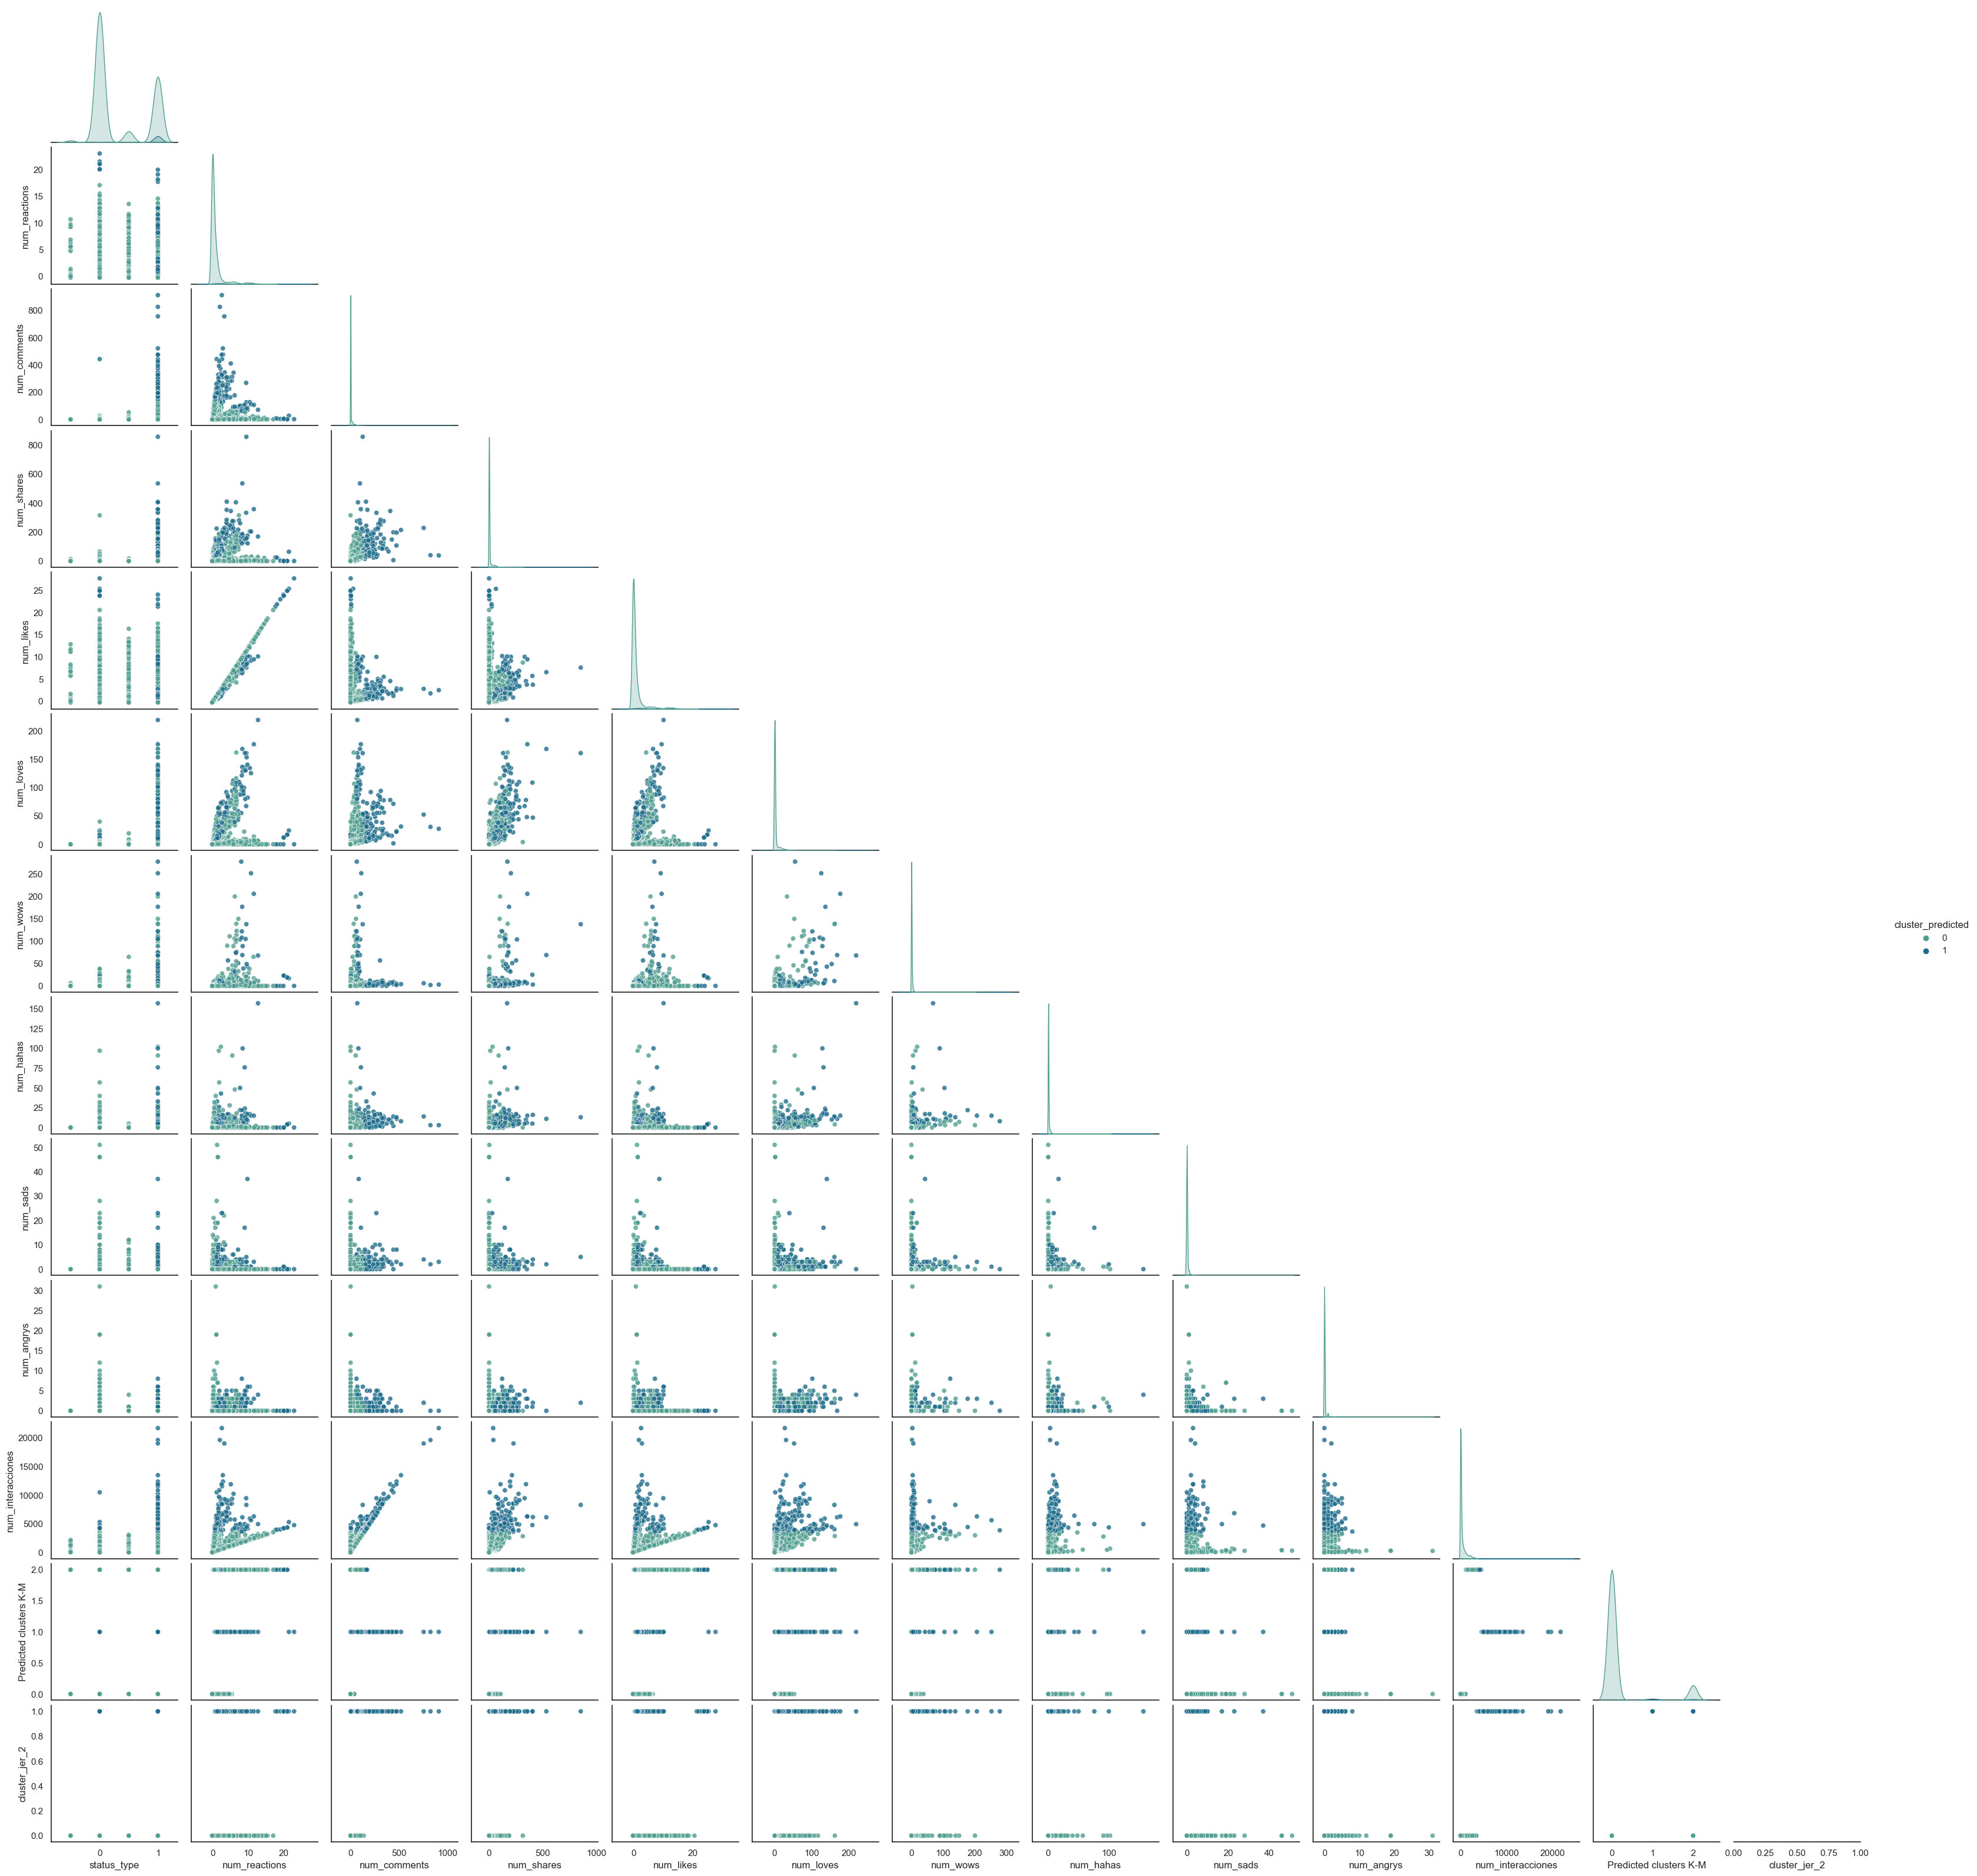

In [55]:
sns.pairplot(df_def, diag_kind = "auto", corner = True, hue = "cluster_predicted", plot_kws = dict(alpha = 0.8), palette='crest')
plt.show()

## Exercici 3
**Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.**

In [44]:

# Kmeans con 4 clusters

km = KMeans(n_clusters=4, random_state=42)


km.fit_predict(X)

# Calculamos Silhoutte Score

score = silhouette_score(X, km.labels_, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

NameError: name 'X' is not defined

La puntuación de la silueta se encuentra dentro del rango [-1, 1]. La puntuación de silueta de 1 significa que los racimos son muy densos y bien separados. La puntuación de 0 significa que los clústeres se superponen. La puntuación inferior a 0 significa que los datos pertenecientes a los clústeres pueden ser erróneos/incorrectos